# Linear Algebra for Machine Learning

In [31]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
import seaborn as sns
import cmath
import math

# Set random seed for reproducibility
np.random.seed(42)
plt.style.use('seaborn-v0_8')

---
## Part 1: Vectors & Basic Operations

### What is a Vector?
In ML, vectors represent:
- **Feature vectors**: Each data point (e.g., [height, weight, age])
- **Model parameters**: Weights in linear regression
- **Embeddings**: Word vectors, image features

In [6]:
# Creating vectors in NumPy
# Example: Student data [height_cm, weight_kg, age_years]
student_1 = np.array([170, 65, 20])
student_2 = np.array([180, 75, 22])

print(f"Student 1 features: {student_1}")
print(f"Student 2 features: {student_2}")
print(f"Vector shape: {student_1.shape}")
print(f"Vector dimension: {len(student_1)}")

Student 1 features: [170  65  20]
Student 2 features: [180  75  22]
Vector shape: (3,)
Vector dimension: 3


### Key Vector Operations

#### 1. Dot Product (Scalar Product)
**Mathematical Definition**: $\vec{a} \cdot \vec{b} = \sum_{i=1}^{n} a_i b_i$

**ML Applications**:
- Similarity measurement
- Linear regression predictions
- Neural network computations

#### Exercise 1.1: Implement dot product

In [7]:
def dot_product_manual(a, b):
    """Compute dot product manually"""
    # TODO: Implement using a loop
    result = 0
    for i in range(len(a)):
        result += a[i] * b[i]
    return result

# Compare with NumPy
manual_result = dot_product_manual(student_1, student_2)
numpy_result = np.dot(student_1, student_2)

print(f"Manual dot product: {manual_result}")
print(f"NumPy dot product: {numpy_result}")
print(f"Alternative syntax: {student_1 @ student_2}")

Manual dot product: 35915
NumPy dot product: 35915
Alternative syntax: 35915


#### 2. Vector Norms (Magnitude)
**L2 Norm (Euclidean)**: $||\vec{v}||_2 = \sqrt{\sum_{i=1}^{n} v_i^2}$

**ML Applications**:
- Feature normalization
- Distance calculations
- Regularization in models

#### Exercise 1.2: Vector norms and normalization

In [8]:

# L2 norm (Euclidean distance from origin)
norm_student_1 = np.linalg.norm(student_1)
print(f"L2 norm of student 1: {norm_student_1:.2f}")

# Normalize vector (unit vector)
student_1_normalized = student_1 / norm_student_1
print(f"Normalized student 1: {student_1_normalized}")
print(f"Norm of normalized vector: {np.linalg.norm(student_1_normalized):.6f}")

# TODO: Calculate L1 norm (Manhattan distance)
l1_norm = np.sum(np.abs(student_1))
print(f"L1 norm of student 1: {l1_norm}")

L2 norm of student 1: 183.10
Normalized student 1: [0.92846284 0.3550005  0.10923092]
Norm of normalized vector: 1.000000
L1 norm of student 1: 255


In [20]:
num = np.sum([i*i for i in student_1])
print(cmath.sqrt(num))

(183.09833423600554+0j)


#### 3. Cosine Similarity
**Formula**: $\text{cosine similarity} = \frac{\vec{a} \cdot \vec{b}}{||\vec{a}|| ||\vec{b}||}$

**Range**: [-1, 1] where 1 = identical direction, 0 = perpendicular, -1 = opposite

**ML Applications**: Document similarity, recommendation systems

#### Exercise 1.3: Implement cosine similarity


Cosine similarity between students: 0.9996


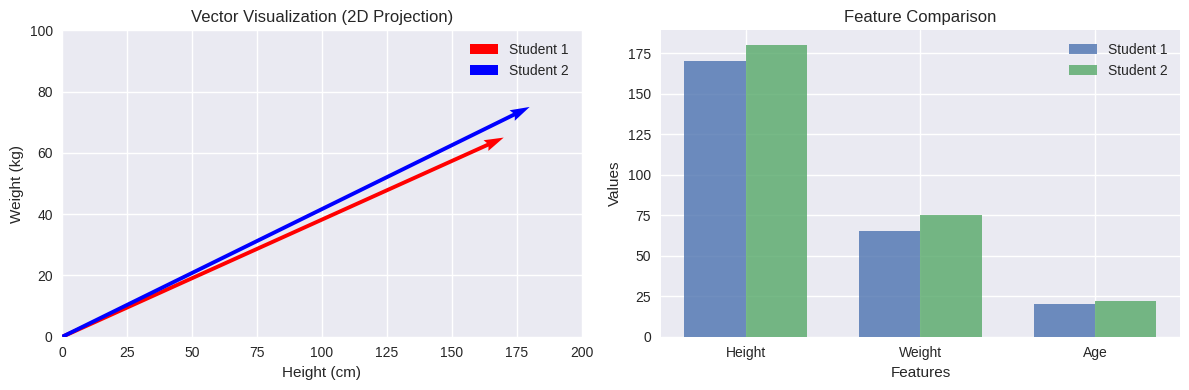

In [21]:
def cosine_similarity(a, b):
    """Calculate cosine similarity between two vectors"""
    dot_product = np.dot(a, b)
    norms = np.linalg.norm(a) * np.linalg.norm(b)
    return dot_product / norms

# Example: Compare students
similarity = cosine_similarity(student_1, student_2)
print(f"Cosine similarity between students: {similarity:.4f}")

# Visualize vectors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 2D projection for visualization (using first 2 features)
ax1.quiver(0, 0, student_1[0], student_1[1], angles='xy', scale_units='xy', scale=1, color='red', label='Student 1')
ax1.quiver(0, 0, student_2[0], student_2[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Student 2')
ax1.set_xlim(0, 200)
ax1.set_ylim(0, 100)
ax1.set_xlabel('Height (cm)')
ax1.set_ylabel('Weight (kg)')
ax1.legend()
ax1.grid(True)
ax1.set_title('Vector Visualization (2D Projection)')

# Bar plot of all features
x = ['Height', 'Weight', 'Age']
width = 0.35
x_pos = np.arange(len(x))
ax2.bar(x_pos - width/2, student_1, width, label='Student 1', alpha=0.8)
ax2.bar(x_pos + width/2, student_2, width, label='Student 2', alpha=0.8)
ax2.set_xlabel('Features')
ax2.set_ylabel('Values')
ax2.set_title('Feature Comparison')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(x)
ax2.legend()

plt.tight_layout()
plt.show()

### Beginner Exercises: Building Foundation

Let's practice basic vector operations that form the foundation of ML algorithms.

#### Exercise 1.4

In [22]:
# Given two feature vectors representing houses
house_1 = np.array([1200, 3, 2, 15])  # [sqft, bedrooms, bathrooms, age_years]
house_2 = np.array([1800, 4, 3, 5])

# TODO: Calculate the following
# 1. Euclidean distance between houses
distance = np.linalg.norm(house_1 - house_2)

# 2. Cosine similarity
similarity = np.dot(house_1, house_2) / (np.linalg.norm(house_1) * np.linalg.norm(house_2))

# 3. Normalize both house vectors
house_1_norm = house_1 / np.linalg.norm(house_1)
house_2_norm = house_2 / np.linalg.norm(house_2)

print(f"Distance: {distance:.2f}")
print(f"Similarity: {similarity:.4f}")
print(f"House 1 normalized: {house_1_norm}")
print(f"House 2 normalized: {house_2_norm}")

Distance: 600.08
Similarity: 1.0000
House 1 normalized: [0.99991737 0.00249979 0.00166653 0.01249897]
House 2 normalized: [0.99999228 0.00222221 0.00166665 0.00277776]


#### Exercise 1.5: 🟢 Vector Addition and Subtraction
#### Learning Objective: Understand vector arithmetic and geometric interpretation


Vector Operations:
Motion 1: [3 4]
Motion 2: [-1  2]

Vector sum (combined motion): [2 6]
Vector difference: [4 2]
Scalar multiplication (2 * motion_1): [6 8]


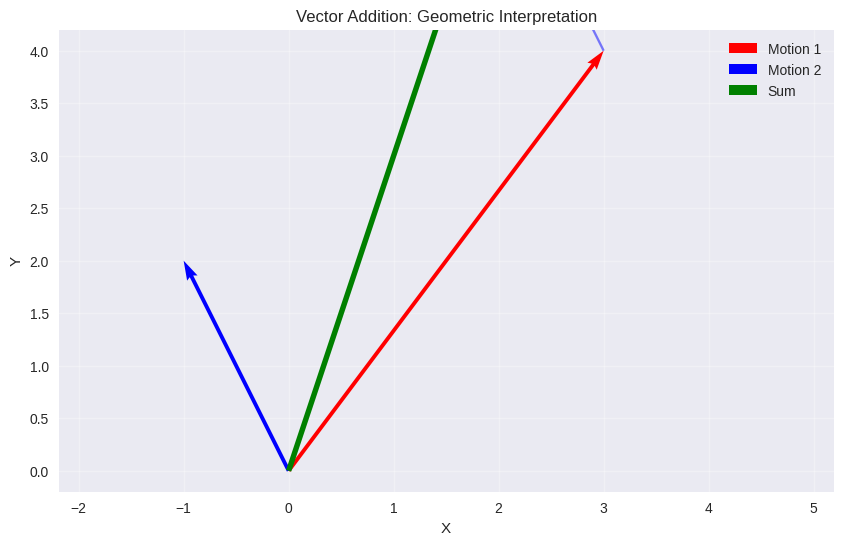


Geometric verification:
Length of motion_1: 5.00
Length of motion_2: 2.24
Length of sum: 6.32
Triangle inequality satisfied: True
(1.2246467991473532e-16-0j)


In [30]:

# Two motion vectors representing displacement
motion_1 = np.array([3, 4])  # 3 units right, 4 units up
motion_2 = np.array([-1, 2]) # 1 unit left, 2 units up

print("Vector Operations:")
print(f"Motion 1: {motion_1}")
print(f"Motion 2: {motion_2}")

# TODO: Calculate vector operations
vector_sum = motion_1 + motion_2
vector_diff = motion_1 - motion_2
scalar_mult = motion_1 * 2

print(f"\nVector sum (combined motion): {vector_sum}")
print(f"Vector difference: {vector_diff}")
print(f"Scalar multiplication (2 * motion_1): {scalar_mult}")

# Visualize the vectors
plt.figure(figsize=(10, 6))

# Plot vectors from origin
plt.quiver(0, 0, motion_1[0], motion_1[1], angles='xy', scale_units='xy', scale=1, 
           color='red', width=0.005, label='Motion 1')
plt.quiver(0, 0, motion_2[0], motion_2[1], angles='xy', scale_units='xy', scale=1, 
           color='blue', width=0.005, label='Motion 2')
plt.quiver(0, 0, vector_sum[0], vector_sum[1], angles='xy', scale_units='xy', scale=1, 
           color='green', width=0.007, label='Sum')

# Plot vector addition graphically (tip-to-tail)
plt.quiver(motion_1[0], motion_1[1], motion_2[0], motion_2[1], angles='xy', scale_units='xy', 
           scale=1, color='blue', width=0.003, alpha=0.5)

plt.xlim(-2, 6)
plt.ylim(-1, 7)
plt.grid(True, alpha=0.3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Vector Addition: Geometric Interpretation')
plt.legend()
plt.axis('equal')
plt.show()

# Quick check
print(f"\nGeometric verification:")
print(f"Length of motion_1: {np.linalg.norm(motion_1):.2f}")
print(f"Length of motion_2: {np.linalg.norm(motion_2):.2f}")
print(f"Length of sum: {np.linalg.norm(vector_sum):.2f}")
print(f"Triangle inequality satisfied: {np.linalg.norm(vector_sum) <= np.linalg.norm(motion_1) + np.linalg.norm(motion_2)}")


#### Exercise 1.6: 🟢 Finding Angles Between Vectors
#### Learning Objective: Understand geometric relationships in vector spaces


User Movie Preferences (1-5 scale):
User A: [5 2 1 4]
User B: [2 5 4 1]
User C: [5 2 1 4]

Angles between user preferences:
A-B: 52.5°
A-C: 0.0°
B-C: 52.5°

Interpretation:
- Small angle (< 30°): Very similar preferences
- Medium angle (30-60°): Somewhat similar
- Large angle (60-90°): Different preferences
- 90°: Orthogonal (no correlation)
- > 90°: Opposite preferences


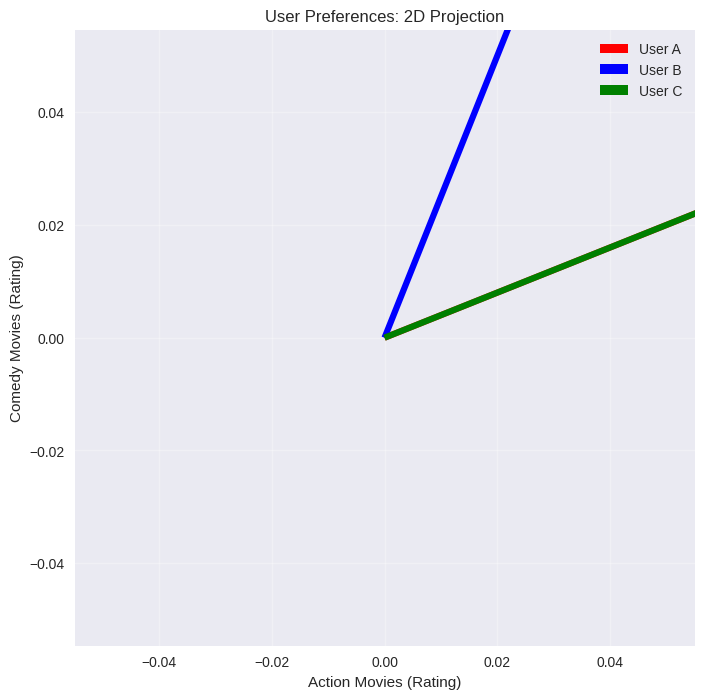


 Think: If two users have a 90° angle between their preference vectors,
what does this tell us about their movie tastes?


In [33]:

# Two user preference vectors for movie genres
user_A_preferences = np.array([5, 2, 1, 4])  # [Action, Comedy, Drama, Sci-Fi]
user_B_preferences = np.array([2, 5, 4, 1])
user_C_preferences = np.array([5, 2, 1, 4])  # Same as A

print("User Movie Preferences (1-5 scale):")
print(f"User A: {user_A_preferences}")
print(f"User B: {user_B_preferences}")
print(f"User C: {user_C_preferences}")

def angle_between_vectors(v1, v2):
    # \"\"\"Calculate angle between two vectors in degrees\"\"\"
    # TODO: Implement angle calculation
    # Hint: cos(θ) = (a·b) / (|a||b|)
    # Use np.arccos and np.degrees
    
    cos_angle =  np.dot(v1,v2)/(np.linalg.norm(v1) * np.linalg.norm(v2))
    angle_rad = np.arccos(cos_angle)
    angle_deg = np.rad2deg(angle_rad)
    
    return angle_deg

# Calculate angles
angle_AB = angle_between_vectors(user_A_preferences, user_B_preferences)
angle_AC = angle_between_vectors(user_A_preferences, user_C_preferences)
angle_BC = angle_between_vectors(user_B_preferences, user_C_preferences)

print(f"\nAngles between user preferences:")
print(f"A-B: {angle_AB:.1f}°")
print(f"A-C: {angle_AC:.1f}°")
print(f"B-C: {angle_BC:.1f}°")

# Interpretation
print(f"\nInterpretation:")
print(f"- Small angle (< 30°): Very similar preferences")
print(f"- Medium angle (30-60°): Somewhat similar")
print(f"- Large angle (60-90°): Different preferences")  
print(f"- 90°: Orthogonal (no correlation)")
print(f"- > 90°: Opposite preferences")

# Visualize in 2D (using first two genres)
plt.figure(figsize=(8, 8))
plt.quiver(0, 0, user_A_preferences[0], user_A_preferences[1], angles='xy', 
           scale_units='xy', scale=1, color='red', width=0.01, label='User A')
plt.quiver(0, 0, user_B_preferences[0], user_B_preferences[1], angles='xy', 
           scale_units='xy', scale=1, color='blue', width=0.01, label='User B')
plt.quiver(0, 0, user_C_preferences[0], user_C_preferences[1], angles='xy', 
           scale_units='xy', scale=1, color='green', width=0.01, label='User C')

plt.xlim(0, 6)
plt.ylim(0, 6)
plt.grid(True, alpha=0.3)
plt.xlabel('Action Movies (Rating)')
plt.ylabel('Comedy Movies (Rating)')
plt.title('User Preferences: 2D Projection')
plt.legend()
plt.axis('equal')
plt.show()

# Challenge: What does a 90-degree angle mean for user preferences?
print(f"\n Think: If two users have a 90° angle between their preference vectors,")
print(f"what does this tell us about their movie tastes?")

#### Exercise 1.7: 🟢 Different Norms and Their Meanings
#### Learning Objective: Understand various distance metrics and their applications

Quarterly Sales Performance (in thousands):
Salesperson A: [120  80 150  90]
Salesperson B: [100 110 100 130]
Salesperson C: [200  30  50 160]

Norm Comparison:
Salesperson  L1 (Sum)     L2 (Euclidean)  L∞ (Max)    
A            21.0         226.7           150.0       
B            21.0         221.4           130.0       
C            21.0         262.7           200.0       


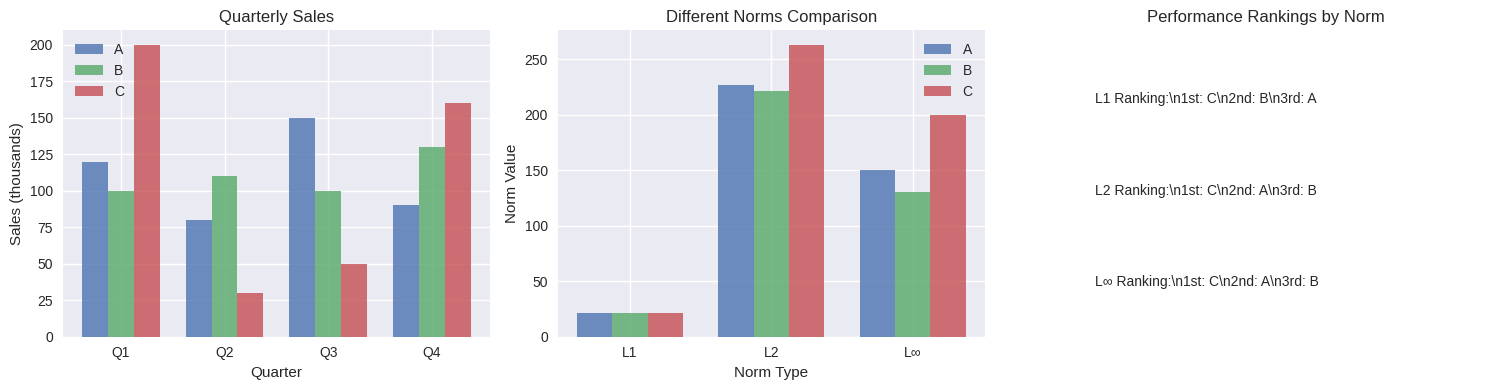


📊 Norm Interpretations:
• L1 (Manhattan): Total sales volume - measures overall productivity
• L2 (Euclidean): 'Natural' distance - balanced performance measure
• L∞ (Maximum): Best quarter - measures peak performance

💡 Which norm would you use to evaluate salespeople and why?


In [36]:

# Sales performance vector: [Q1, Q2, Q3, Q4] sales in thousands
salesperson_A = np.array([120, 80, 150, 90])
salesperson_B = np.array([100, 110, 100, 130])
salesperson_C = np.array([200, 30, 50, 160])

print("Quarterly Sales Performance (in thousands):")
print(f"Salesperson A: {salesperson_A}")
print(f"Salesperson B: {salesperson_B}")
print(f"Salesperson C: {salesperson_C}")

def calculate_norms(vector):
    # TODO: Calculate different norms
    l1_norm = math.sqrt(np.sum(vector))
    l2_norm = np.linalg.norm(vector)
    l_inf_norm = np.max(vector)
    
    return l1_norm, l2_norm, l_inf_norm

# Calculate norms for each salesperson
norms_A = calculate_norms(salesperson_A)
norms_B = calculate_norms(salesperson_B)
norms_C = calculate_norms(salesperson_C)

print(f"\nNorm Comparison:")
print(f"{'Salesperson':<12} {'L1 (Sum)':<12} {'L2 (Euclidean)':<15} {'L∞ (Max)':<12}")
print(f"{'='*60}")
print(f"{'A':<12} {norms_A[0]:<12.1f} {norms_A[1]:<15.1f} {norms_A[2]:<12.1f}")
print(f"{'B':<12} {norms_B[0]:<12.1f} {norms_B[1]:<15.1f} {norms_B[2]:<12.1f}")
print(f"{'C':<12} {norms_C[0]:<12.1f} {norms_C[1]:<15.1f} {norms_C[2]:<12.1f}")

# Visualize the different norms
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

quarters = ['Q1', 'Q2', 'Q3', 'Q4']
width = 0.25
x = np.arange(len(quarters))

# Sales comparison
axes[0].bar(x - width, salesperson_A, width, label='A', alpha=0.8)
axes[0].bar(x, salesperson_B, width, label='B', alpha=0.8)
axes[0].bar(x + width, salesperson_C, width, label='C', alpha=0.8)
axes[0].set_xlabel('Quarter')
axes[0].set_ylabel('Sales (thousands)')
axes[0].set_title('Quarterly Sales')
axes[0].set_xticks(x)
axes[0].set_xticklabels(quarters)
axes[0].legend()

# Norm comparison
norm_types = ['L1', 'L2', 'L∞']
norm_values_A = list(norms_A)
norm_values_B = list(norms_B)
norm_values_C = list(norms_C)

x_norms = np.arange(len(norm_types))
axes[1].bar(x_norms - width, norm_values_A, width, label='A', alpha=0.8)
axes[1].bar(x_norms, norm_values_B, width, label='B', alpha=0.8)
axes[1].bar(x_norms + width, norm_values_C, width, label='C', alpha=0.8)
axes[1].set_xlabel('Norm Type')
axes[1].set_ylabel('Norm Value')
axes[1].set_title('Different Norms Comparison')
axes[1].set_xticks(x_norms)
axes[1].set_xticklabels(norm_types)
axes[1].legend()

# Ranking by each norm
labels = np.array(['A', 'B', 'C'])
l1_ranking = labels[np.argsort([norms_A[0], norms_B[0], norms_C[0]])[::-1]]
l2_ranking = labels[np.argsort([norms_A[1], norms_B[1], norms_C[1]])[::-1]]
linf_ranking = labels[np.argsort([norms_A[2], norms_B[2], norms_C[2]])[::-1]]

axes[2].text(0.1, 0.8, f"L1 Ranking:\\n1st: {l1_ranking[0]}\\n2nd: {l1_ranking[1]}\\n3rd: {l1_ranking[2]}", 
             transform=axes[2].transAxes, fontsize=10, verticalalignment='top')
axes[2].text(0.1, 0.5, f"L2 Ranking:\\n1st: {l2_ranking[0]}\\n2nd: {l2_ranking[1]}\\n3rd: {l2_ranking[2]}", 
             transform=axes[2].transAxes, fontsize=10, verticalalignment='top')
axes[2].text(0.1, 0.2, f"L∞ Ranking:\\n1st: {linf_ranking[0]}\\n2nd: {linf_ranking[1]}\\n3rd: {linf_ranking[2]}", 
             transform=axes[2].transAxes, fontsize=10, verticalalignment='top')
axes[2].set_title('Performance Rankings by Norm')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print(f"\n📊 Norm Interpretations:")
print(f"• L1 (Manhattan): Total sales volume - measures overall productivity")
print(f"• L2 (Euclidean): 'Natural' distance - balanced performance measure") 
print(f"• L∞ (Maximum): Best quarter - measures peak performance")
print(f"\n💡 Which norm would you use to evaluate salespeople and why?")

#### Exercise 1.8: 🟡 Vector Projections and Components
#### Learning Objective: Understand projections for dimensionality reduction and feature extraction


Weather Analysis:
Weather conditions: [  25 1015] [°C, hPa]
Wind vector: [8 6] [m/s East, m/s North]
Reference direction (East): [1 0]

Wind Analysis:
East component (projection): [8. 0.]
North component (orthogonal): [0. 6.]
East speed: 8.0 m/s
North speed: 6.0 m/s
Orthogonality check (should be ~0): 0.000000
Reconstruction error: 0.000000


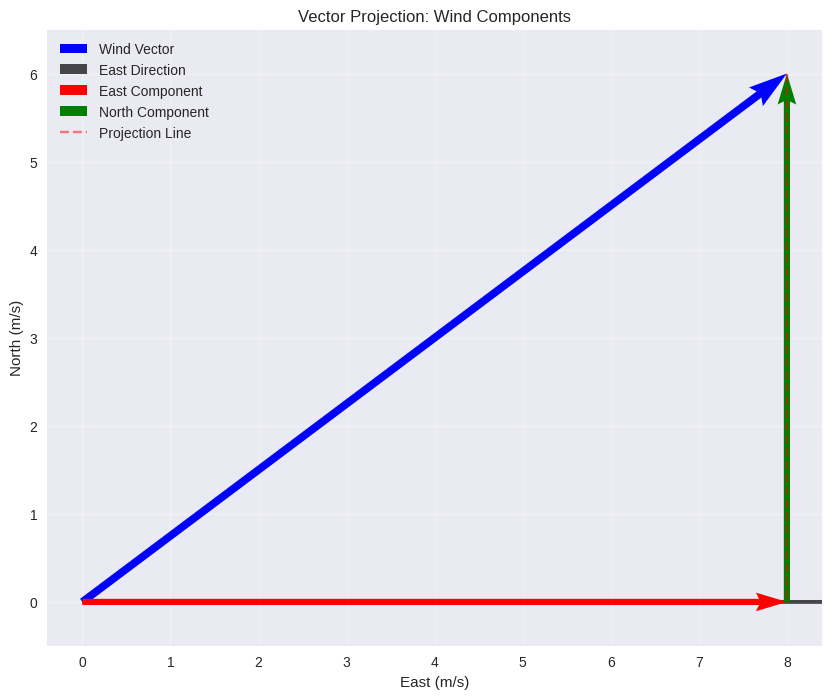


 ML Application:
In PCA, we project high-dimensional data onto principal components
This is exactly what we did - projecting the 2D wind vector onto 1D!
The projection captures the 'main direction' of the wind.

 Challenge: If you were building a wind turbine, would you care more
about the east component or the total wind speed? Why?


In [37]:

# Weather data: [temperature, pressure] and wind vector [wind_x, wind_y]
weather_data = np.array([25, 1015])  # 25°C, 1015 hPa
wind_direction = np.array([1, 0])    # East direction (unit vector)
wind_vector = np.array([8, 6])       # 8 m/s East, 6 m/s North

print("Weather Analysis:")
print(f"Weather conditions: {weather_data} [°C, hPa]")
print(f"Wind vector: {wind_vector} [m/s East, m/s North]")
print(f"Reference direction (East): {wind_direction}")

def vector_projection(vector, onto):
    # TODO: Implement vector projection
    # Formula: proj_onto(vector) = (vector · onto / |onto|²) * onto

    dot_product = np.dot(vector, onto)
    onto_squared = np.dot(onto, onto)
    projection = (dot_product / onto_squared) * onto

    return projection

def orthogonal_component(vector, onto):
    # TODO: Implement orthogonal component
    # Hint: orthogonal = original - projection
    
    proj = vector_projection(vector, onto)
    orthogonal = vector - proj

    return orthogonal

# Project wind onto east direction
wind_east_component = vector_projection(wind_vector, wind_direction)
wind_north_component = orthogonal_component(wind_vector, wind_direction)

print(f"\nWind Analysis:")
print(f"East component (projection): {wind_east_component}")
print(f"North component (orthogonal): {wind_north_component}")
print(f"East speed: {np.linalg.norm(wind_east_component):.1f} m/s")
print(f"North speed: {np.linalg.norm(wind_north_component):.1f} m/s")

# Verify orthogonality
dot_check = np.dot(wind_east_component, wind_north_component)
print(f"Orthogonality check (should be ~0): {dot_check:.6f}")

# Verify reconstruction
reconstructed = wind_east_component + wind_north_component
reconstruction_error = np.linalg.norm(wind_vector - reconstructed)
print(f"Reconstruction error: {reconstruction_error:.6f}")

# Visualize projections
plt.figure(figsize=(10, 8))

# Original vectors
plt.quiver(0, 0, wind_vector[0], wind_vector[1], angles='xy', scale_units='xy', 
           scale=1, color='blue', width=0.01, label='Wind Vector', linewidth=2)
plt.quiver(0, 0, wind_direction[0]*10, wind_direction[1]*10, angles='xy', scale_units='xy', 
           scale=1, color='black', width=0.005, label='East Direction', alpha=0.7)

# Projections
plt.quiver(0, 0, wind_east_component[0], wind_east_component[1], angles='xy', scale_units='xy', 
           scale=1, color='red', width=0.008, label='East Component')
plt.quiver(wind_east_component[0], wind_east_component[1], 
           wind_north_component[0], wind_north_component[1], angles='xy', scale_units='xy', 
           scale=1, color='green', width=0.008, label='North Component')

# Projection line
plt.plot([wind_vector[0], wind_east_component[0]], 
         [wind_vector[1], wind_east_component[1]], 
         'r--', alpha=0.5, label='Projection Line')

plt.xlim(-1, 10)
plt.ylim(-1, 8)
plt.grid(True, alpha=0.3)
plt.xlabel('East (m/s)')
plt.ylabel('North (m/s)')
plt.title('Vector Projection: Wind Components')
plt.legend()
plt.axis('equal')
plt.show()

# ML Application: Feature extraction
print(f"\n ML Application:")
print(f"In PCA, we project high-dimensional data onto principal components")
print(f"This is exactly what we did - projecting the 2D wind vector onto 1D!")
print(f"The projection captures the 'main direction' of the wind.")

# Challenge question
print(f"\n Challenge: If you were building a wind turbine, would you care more")
print(f"about the east component or the total wind speed? Why?")

#### Exercise 1.9: 🟡 Building Similarity Matrices
#### Learning Objective: Create pairwise similarity computations for recommendation systems


Student Skill Profiles (1-10 scale):
Alice : [9 8 6 7 5]
Bob   : [7 9 5 8 6]
Carol : [8 6 9 6 8]
David : [6 7 8 9 7]
Eve   : [9 8 7 6 9]

Similarity Matrices:

Cosine Similarity:
        Alice   Bob     Carol   David   Eve     
Alice      1.000   0.984   0.956   0.960   0.973
Bob        0.984   1.000   0.938   0.971   0.966
Carol      0.956   0.938   1.000   0.971   0.984
David      0.960   0.971   0.971   1.000   0.961
Eve        0.973   0.966   0.984   0.961   1.000

Similarity Analysis:
Most similar pair: Carol & Eve (similarity: 0.984)
Least similar pair: Bob & Carol (similarity: 0.938)


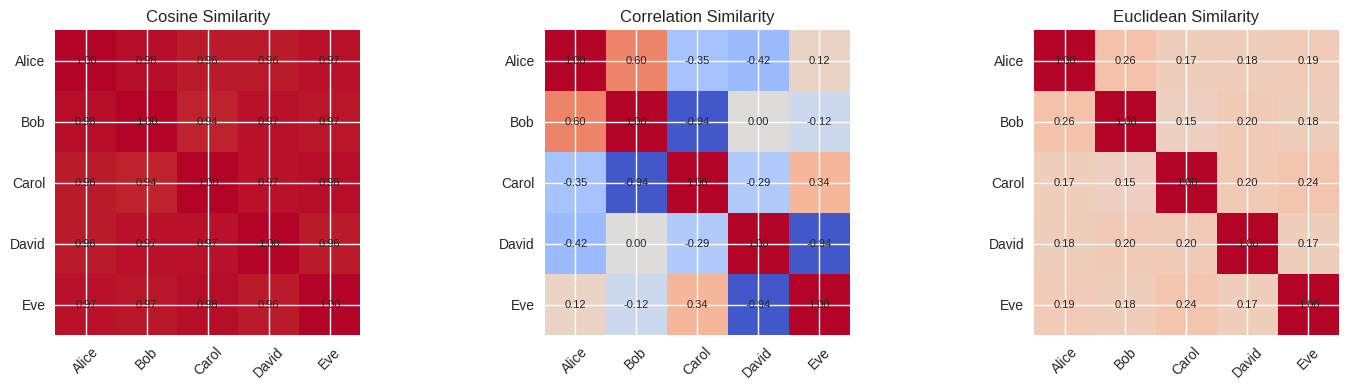


Team Formation:
Most diverse team: ['Bob', 'Carol'] (complementary skills)
Alice's best study partner: Bob (similarity: 0.984)
Bob's best study partner: Alice (similarity: 0.984)
Carol's best study partner: Eve (similarity: 0.984)
David's best study partner: Carol (similarity: 0.971)
Eve's best study partner: Carol (similarity: 0.984)

🎯 ML Applications:
• Recommendation systems: Find similar users/items
• Clustering: Group similar data points
• Collaborative filtering: 'Users like you also liked...'
• Feature selection: Remove highly correlated features


In [38]:

# Student skill profiles: [Math, Programming, Communication, Creativity, Leadership]
students = {
    'Alice': np.array([9, 8, 6, 7, 5]),
    'Bob': np.array([7, 9, 5, 8, 6]), 
    'Carol': np.array([8, 6, 9, 6, 8]),
    'David': np.array([6, 7, 8, 9, 7]),
    'Eve': np.array([9, 8, 7, 6, 9])
}

skill_names = ['Math', 'Programming', 'Communication', 'Creativity', 'Leadership']
student_names = list(students.keys())
student_vectors = np.array(list(students.values()))

print("Student Skill Profiles (1-10 scale):")
for name, skills in students.items():
    print(f"{name:6}: {skills}")

def compute_similarity_matrix(vectors, metric='cosine'):
    n = len(vectors)
    similarity_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if metric == 'cosine':
                # TODO: Implement cosine similarity
                similarity = np.dot(vectors[i], vectors[j]) / (np.linalg.norm(vectors[i]) * np.linalg.norm(vectors[j]))
            elif metric == 'correlation':
                # TODO: Implement Pearson correlation
                # Hint: Use np.corrcoef or implement manually
                similarity = np.corrcoef(vectors[i], vectors[j])[0, 1]
            elif metric == 'euclidean':
                # TODO: Convert distance to similarity
                # Hint: similarity = 1 / (1 + distance)
                distance = np.linalg.norm(vectors[i] - vectors[j])
                similarity = 1 / (1 + distance)
            
            similarity_matrix[i, j] = similarity
    
    return similarity_matrix

# Compute different similarity matrices
cosine_sim = compute_similarity_matrix(student_vectors, 'cosine')
correlation_sim = compute_similarity_matrix(student_vectors, 'correlation')
euclidean_sim = compute_similarity_matrix(student_vectors, 'euclidean')

print(f"\nSimilarity Matrices:")

# Display cosine similarity
print(f"\nCosine Similarity:")
print(f"{'':8}", end='')
for name in student_names:
    print(f"{name:8}", end='')
print()
for i, name in enumerate(student_names):
    print(f"{name:8}", end='')
    for j in range(len(student_names)):
        print(f"{cosine_sim[i,j]:8.3f}", end='')
    print()

# Find most and least similar pairs
def find_extreme_pairs(similarity_matrix, names):
    n = len(names)
    max_sim = -1
    min_sim = 2
    max_pair = None
    min_pair = None
    
    for i in range(n):
        for j in range(i+1, n):  # Only upper triangle, exclude diagonal
            if similarity_matrix[i, j] > max_sim:
                max_sim = similarity_matrix[i, j]
                max_pair = (names[i], names[j])
            if similarity_matrix[i, j] < min_sim:
                min_sim = similarity_matrix[i, j]
                min_pair = (names[i], names[j])
    
    return max_pair, max_sim, min_pair, min_sim

max_pair, max_sim, min_pair, min_sim = find_extreme_pairs(cosine_sim, student_names)

print(f"\nSimilarity Analysis:")
print(f"Most similar pair: {max_pair[0]} & {max_pair[1]} (similarity: {max_sim:.3f})")
print(f"Least similar pair: {min_pair[0]} & {min_pair[1]} (similarity: {min_sim:.3f})")

# Visualize similarity matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, (sim_matrix, title) in enumerate([(cosine_sim, 'Cosine'),
                                         (correlation_sim, 'Correlation'),
                                         (euclidean_sim, 'Euclidean')]):
    im = axes[i].imshow(sim_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    axes[i].set_title(f'{title} Similarity')
    axes[i].set_xticks(range(len(student_names)))
    axes[i].set_yticks(range(len(student_names)))
    axes[i].set_xticklabels(student_names, rotation=45)
    axes[i].set_yticklabels(student_names)
    
    # Add text annotations
    for x in range(len(student_names)):
        for y in range(len(student_names)):
            axes[i].text(x, y, f'{sim_matrix[y,x]:.2f}', 
                        ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Team formation based on similarity
def form_diverse_teams(similarity_matrix, names, team_size=2):
    # TODO: Implement team formation algorithm

    # For now, find the pair with lowest similarity

    
    min_sim_idx = np.unravel_index(np.argmin(similarity_matrix + np.eye(len(names))*2), 
                                   similarity_matrix.shape)
    team = [names[min_sim_idx[0]], names[min_sim_idx[1]]]
    
    return team

diverse_team = form_diverse_teams(cosine_sim, student_names)
print(f"\nTeam Formation:")
print(f"Most diverse team: {diverse_team} (complementary skills)")

# Recommendation system
def recommend_study_partner(target_student, similarity_matrix, names, exclude_self=True):
    target_idx = names.index(target_student)
    similarities = similarity_matrix[target_idx].copy()
    
    if exclude_self:
        similarities[target_idx] = -1  # Exclude self
    
    best_match_idx = np.argmax(similarities)
    return names[best_match_idx], similarities[best_match_idx]

for student in student_names:
    partner, sim_score = recommend_study_partner(student, cosine_sim, student_names)
    print(f"{student}'s best study partner: {partner} (similarity: {sim_score:.3f})")

print(f"\n🎯 ML Applications:")
print(f"• Recommendation systems: Find similar users/items")
print(f"• Clustering: Group similar data points")
print(f"• Collaborative filtering: 'Users like you also liked...'")
print(f"• Feature selection: Remove highly correlated features")

### Hard Exercises: Deeper Applications

These exercises combine multiple concepts and introduce more advanced techniques.

#### Exercise 1.11: 🔴 Custom Distance Metrics for ML
#### Learning Objective: Design and implement domain-specific distance measures


In [ ]:

# Text document vectors (word frequencies)
documents = {
    'doc1': np.array([3, 5, 2, 1, 0]),  # [science, tech, politics, sports, arts]
    'doc2': np.array([4, 4, 1, 0, 1]),
    'doc3': np.array([0, 1, 5, 3, 2]),
    'doc4': np.array([1, 2, 0, 6, 1]),
    'doc5': np.array([2, 3, 1, 1, 4])
}

categories = ['Science', 'Technology', 'Politics', 'Sports', 'Arts']
doc_names = list(documents.keys())
doc_vectors = np.array(list(documents.values()))

print("Document Word Frequency Vectors:")
for name, vector in documents.items():
    print(f"{name}: {vector} {categories}")

class CustomDistanceMetrics:
    
    @staticmethod
    def weighted_euclidean(x, y, weights):
        # TODO: Implement weighted Euclidean distance
        # Formula: sqrt(sum(w_i * (x_i - y_i)^2))
        diff = x - y
        weighted_diff_sq = weights * (diff ** 2)
        distance = np.sqrt(np.sum(weighted_diff_sq))
        return distance
    
    @staticmethod
    def canberra_distance(x, y):
        # TODO: Implement Canberra distance
        # Formula: sum(|x_i - y_i| / (|x_i| + |y_i|))
        # Handle division by zero with small epsilon
        epsilon = 1e-10
        numerator = np.abs(x - y)
        denominator = np.abs(x) + np.abs(y) + epsilon
        distance = np.sum(numerator / denominator)
        return distance
    
    @staticmethod
    def cosine_distance(x, y):
        # TODO: Implement cosine distance
        cos_sim = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
        cos_dist = 1 - cos_sim
        return cos_dist
    
    @staticmethod
    def earth_movers_distance(x, y):
        # TODO: Implement simplified EMD
        # For vectors, this is the cumulative difference
        x_cum = np.cumsum(x / np.sum(x))  # Normalize to probability
        y_cum = np.cumsum(y / np.sum(y))
        emd = np.sum(np.abs(x_cum - y_cum))
        return emd

# Define importance weights for documents (some topics more important)
topic_weights = np.array([1.5, 1.5, 1.0, 0.8, 0.8])  # Science/Tech more important

# Test custom distance metrics
metrics = CustomDistanceMetrics()

print(f"\nDistance Analysis between doc1 and doc2:")
print(f"Euclidean: {np.linalg.norm(doc_vectors[0] - doc_vectors[1]):.3f}")
print(f"Weighted Euclidean: {metrics.weighted_euclidean(doc_vectors[0], doc_vectors[1], topic_weights):.3f}")
print(f"Canberra: {metrics.canberra_distance(doc_vectors[0], doc_vectors[1]):.3f}")
print(f"Cosine Distance: {metrics.cosine_distance(doc_vectors[0], doc_vectors[1]):.3f}")
print(f"Earth Mover's: {metrics.earth_movers_distance(doc_vectors[0], doc_vectors[1]):.3f}")

# Create distance matrices for different metrics
def create_distance_matrix(vectors, distance_func, **kwargs):
    n = len(vectors)
    matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if i == j:
                matrix[i, j] = 0
            else:
                matrix[i, j] = distance_func(vectors[i], vectors[j], **kwargs)
    
    return matrix

# Compute distance matrices
euclidean_dist = create_distance_matrix(doc_vectors, lambda x, y: np.linalg.norm(x - y))
weighted_dist = create_distance_matrix(doc_vectors, metrics.weighted_euclidean, weights=topic_weights)
canberra_dist = create_distance_matrix(doc_vectors, metrics.canberra_distance)
cosine_dist = create_distance_matrix(doc_vectors, metrics.cosine_distance)

# Visualize distance matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

distance_matrices = [euclidean_dist, weighted_dist, canberra_dist, cosine_dist]
titles = ['Euclidean', 'Weighted Euclidean', 'Canberra', 'Cosine']

for i, (dist_matrix, title) in enumerate(zip(distance_matrices, titles)):
    im = axes[i].imshow(dist_matrix, cmap='viridis')
    axes[i].set_title(f'{title} Distance')
    axes[i].set_xticks(range(len(doc_names)))
    axes[i].set_yticks(range(len(doc_names)))
    axes[i].set_xticklabels(doc_names)
    axes[i].set_yticklabels(doc_names)
    
    # Add text annotations
    for x in range(len(doc_names)):
        for y in range(len(doc_names)):
            axes[i].text(x, y, f'{dist_matrix[y,x]:.2f}', 
                        ha='center', va='center', fontsize=8, color='white')
    
    plt.colorbar(im, ax=axes[i])

plt.tight_layout()
plt.show()

# Document clustering based on different metrics
def find_closest_documents(distance_matrix, doc_names):
    n = len(doc_names)
    min_dist = float('inf')
    closest_pair = None
    
    for i in range(n):
        for j in range(i+1, n):
            if distance_matrix[i, j] < min_dist:
                min_dist = distance_matrix[i, j]
                closest_pair = (doc_names[i], doc_names[j])
    
    return closest_pair, min_dist

print(f"\nClosest Document Pairs by Different Metrics:")
for dist_matrix, metric_name in zip(distance_matrices, titles):
    pair, distance = find_closest_documents(dist_matrix, doc_names)
    print(f"{metric_name:18}: {pair[0]} & {pair[1]} (distance: {distance:.3f})")

# Performance analysis: which metric works best for document similarity?
def evaluate_metric_consistency(distance_matrices, doc_vectors):
    n_metrics = len(distance_matrices)
    consistency_scores = np.zeros((n_metrics, n_metrics))
    
    for i in range(n_metrics):
        for j in range(n_metrics):
            # Calculate rank correlation between distance matrices
            rank_corr = np.corrcoef(distance_matrices[i].flatten(), 
                                   distance_matrices[j].flatten())[0, 1]
            consistency_scores[i, j] = rank_corr
    
    return consistency_scores

consistency = evaluate_metric_consistency(distance_matrices, doc_vectors)

print(f"\nMetric Consistency Analysis (Correlation):")
print(f"{'':18}", end='')
for title in titles:
    print(f"{title:12}", end='')
print()
for i, title in enumerate(titles):
    print(f"{title:18}", end='')
    for j in range(len(titles)):
        print(f"{consistency[i,j]:12.3f}", end='')
    print()

print(f"\n🎯 Choosing the Right Metric:")
print(f"• Euclidean: General purpose, treats all features equally")
print(f"• Weighted Euclidean: When features have different importance")
print(f"• Canberra: Sensitive to small changes, good for sparse data")
print(f"• Cosine: Ignores magnitude, focuses on direction/proportion")
print(f"• Earth Mover's: Considers feature order/structure")

print(f"\n💡 Design Challenge:")
print(f"If you were building a document search engine, which metric would")
print(f"you choose and why? Consider the trade-offs!")

---
## Part 2: Matrices & Operations

### What are Matrices in ML?
- **Data Matrix**: Rows = samples, Columns = features
- **Weight Matrix**: Parameters in neural networks
- **Covariance Matrix**: Relationships between features
- **Transformation Matrix**: PCA, rotations, scaling

In [41]:
# Example: Student dataset matrix
# Each row is a student, columns are [height, weight, age, grade]
students_data = np.array([
    [170, 65, 20, 85],  # Student 1
    [180, 75, 22, 90],  # Student 2
    [165, 60, 19, 88],  # Student 3
    [175, 70, 21, 92],  # Student 4
    [185, 80, 23, 87]   # Student 5
])

print(f"Data matrix shape: {students_data.shape}")
print(f"Number of students: {students_data.shape[0]}")
print(f"Number of features: {students_data.shape[1]}")
print(f"\nData matrix:")
print(students_data)

Data matrix shape: (5, 4)
Number of students: 5
Number of features: 4

Data matrix:
[[170  65  20  85]
 [180  75  22  90]
 [165  60  19  88]
 [175  70  21  92]
 [185  80  23  87]]


### Matrix Operations

#### 1. Matrix Multiplication
**Rule**: $(A \times B)_{ij} = \sum_{k} A_{ik} B_{kj}$

**Requirement**: columns of A = rows of B

**ML Application**: Computing predictions, transforming features

#### Exercise 2.1: Linear regression prediction

In [42]:

# Predict grade based on [height, weight, age]


# Features matrix (without grade column)
X = students_data[:, :3]  # height, weight, age
y = students_data[:, 3]   # grade

# Simple weight matrix for linear combination
# Weights: [0.1 for height, 0.2 for weight, 1.0 for age]
weights = np.array([0.1, 0.2, 1.0]).reshape(-1, 1)

print(f"Feature matrix X shape: {X.shape}")
print(f"Weight vector shape: {weights.shape}")

# Matrix multiplication: X @ weights
predictions = X @ weights
print(f"\nPredictions shape: {predictions.shape}")
print(f"Predictions: {predictions.flatten()}")
print(f"Actual grades: {y}")

Feature matrix X shape: (5, 3)
Weight vector shape: (3, 1)

Predictions shape: (5, 1)
Predictions: [50.  55.  47.5 52.5 57.5]
Actual grades: [85 90 88 92 87]


#### 2. Matrix Transpose
**Operation**: Flip matrix along diagonal (rows ↔ columns)

**ML Applications**: 
- Computing gradients
- Changing data layout
- Solving normal equations

#### Exercise 2.2: Matrix transpose


In [ ]:
print(f"Original matrix shape: {X.shape}")
print(f"Original matrix:")
print(X)

# Transpose
X_T = X.T
print(f"\nTransposed shape: {X_T.shape}")
print(f"Transposed matrix:")
print(X_T)

# Common ML operation: X^T @ X (used in normal equation)
XTX = X_T @ X
print(f"\nX^T @ X shape: {XTX.shape}")
print(f"X^T @ X (covariance-like matrix):")
print(XTX)

### Exercise: Data Transformation

#### Exercise 2.3: Feature standardization (Z-score normalization)


Original mean: [175.  70.  21.]
Original std: [7.07106781 7.07106781 1.41421356]

Standardized mean: [0. 0. 0.]
Standardized std: [1. 1. 1.]


/tmp/ipykernel_107088/1512279407.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(X, labels=['Height', 'Weight', 'Age'])
/tmp/ipykernel_107088/1512279407.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(X_std, labels=['Height', 'Weight', 'Age'])


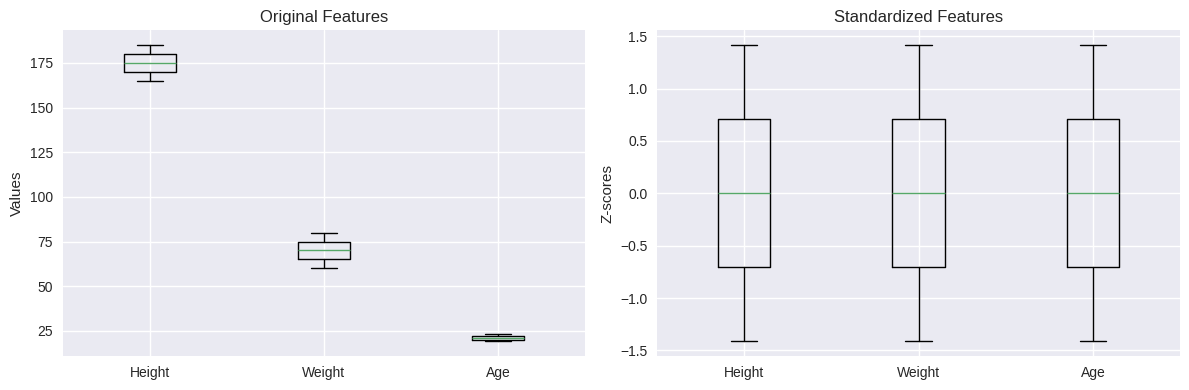

In [44]:
# Formula: z = (x - μ) / σ

def standardize_features(X):
    """Standardize features to have mean=0 and std=1"""
    # TODO: Implement standardization
    mean = np.mean(X, axis=0)  # Mean of each column
    std = np.std(X, axis=0)    # Standard deviation of each column
    X_standardized = (X - mean) / std
    return X_standardized, mean, std

# Apply standardization
X_std, mean_vals, std_vals = standardize_features(X)

print(f"Original mean: {np.mean(X, axis=0)}")
print(f"Original std: {np.std(X, axis=0)}")
print(f"\nStandardized mean: {np.mean(X_std, axis=0)}")
print(f"Standardized std: {np.std(X_std, axis=0)}")

# Visualize before and after
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.boxplot(X, labels=['Height', 'Weight', 'Age'])
ax1.set_title('Original Features')
ax1.set_ylabel('Values')

ax2.boxplot(X_std, labels=['Height', 'Weight', 'Age'])
ax2.set_title('Standardized Features')
ax2.set_ylabel('Z-scores')

plt.tight_layout()
plt.show()

#### Exercise 2.5: 🟢 Matrix Addition and Broadcasting

In [ ]:

# Learning Objective: Master matrix arithmetic and NumPy broadcasting rules

# Sensor network data: multiple sensors recording over time
# Each row is a time point, each column is a sensor
sensor_readings = np.array([
    [22.5, 18.2, 25.1, 20.8],  # Time 1
    [23.0, 18.5, 25.3, 21.0],  # Time 2
    [22.8, 18.3, 25.0, 20.9],  # Time 3
    [23.2, 18.7, 25.5, 21.2]   # Time 4
])

# Calibration offsets for each sensor (systematic errors)
calibration_offsets = np.array([0.5, -0.2, 0.3, -0.1])

# Time-based drift (affects all sensors equally over time)
time_drift = np.array([[0.1], [0.2], [0.3], [0.4]])

print("Sensor Network Calibration:")
print(f"Raw readings shape: {sensor_readings.shape}")
print(f"Calibration offsets: {calibration_offsets}")
print(f"Time drift: {time_drift.flatten()}")

# TODO: Basic matrix operations
# 1. Add calibration offset to all readings
calibrated_readings = 

# 2. Remove time drift from calibrated readings  
drift_corrected = # Your code here

# 3. Calculate sensor mean and standard deviation
sensor_means = # Your code here
sensor_stds = # Your code here

print(f"\nMatrix Operations Results:")
print(f"Original readings:\\n{sensor_readings}")
print(f"After calibration:\\n{calibrated_readings}")
print(f"After drift correction:\\n{drift_corrected}")
print(f"Sensor means: {sensor_means}")
print(f"Sensor stds: {sensor_stds}")

# Broadcasting examples
print(f"\nBroadcasting Examples:")

# Example 1: Add different value to each row
row_additions = np.array([1, 2, 3, 4]).reshape(-1, 1)
result1 = sensor_readings + row_additions
print(f"Add [1,2,3,4] to each row:\\n{result1}")

# Example 2: Multiply each column by different factor
col_multipliers = np.array([1.1, 0.9, 1.05, 0.95])
result2 = sensor_readings * col_multipliers
print(f"Multiply columns by [1.1, 0.9, 1.05, 0.95]:\\n{result2}")

# Example 3: Element-wise operations
sensor_squared = sensor_readings ** 2
sensor_differences = sensor_readings[1:] - sensor_readings[:-1]
print(f"Squared readings shape: {sensor_squared.shape}")
print(f"Time differences shape: {sensor_differences.shape}")

# Visualize the corrections
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Raw vs calibrated data
axes[0,0].plot(sensor_readings, 'o-', alpha=0.7)
axes[0,0].plot(calibrated_readings, 's--', alpha=0.7)
axes[0,0].set_title('Raw vs Calibrated Readings')
axes[0,0].set_xlabel('Time')
axes[0,0].set_ylabel('Temperature')
axes[0,0].legend(['Raw S1', 'Raw S2', 'Raw S3', 'Raw S4', 
                  'Cal S1', 'Cal S2', 'Cal S3', 'Cal S4'])

# Plot 2: Time drift effect
axes[0,1].plot(sensor_readings.mean(axis=1), 'o-', label='Raw Mean')
axes[0,1].plot(drift_corrected.mean(axis=1), 's-', label='Corrected Mean')
axes[0,1].set_title('Time Drift Correction')
axes[0,1].set_xlabel('Time')
axes[0,1].set_ylabel('Average Reading')
axes[0,1].legend()

# Plot 3: Sensor statistics
x_pos = np.arange(4)
axes[1,0].bar(x_pos - 0.2, sensor_means, 0.4, label='Mean', alpha=0.7)
axes[1,0].bar(x_pos + 0.2, sensor_stds, 0.4, label='Std Dev', alpha=0.7)
axes[1,0].set_title('Sensor Statistics')
axes[1,0].set_xlabel('Sensor')
axes[1,0].set_ylabel('Value')
axes[1,0].set_xticks(x_pos)
axes[1,0].set_xticklabels(['S1', 'S2', 'S3', 'S4'])
axes[1,0].legend()

# Plot 4: Broadcasting visualization
axes[1,1].imshow(result2, cmap='viridis', aspect='auto')
axes[1,1].set_title('Column Scaling (Broadcasting)')
axes[1,1].set_xlabel('Sensor')
axes[1,1].set_ylabel('Time')
for i in range(4):
    for j in range(4):
        axes[1,1].text(j, i, f'{result2[i,j]:.1f}', ha='center', va='center')

plt.tight_layout()
plt.show()

# Challenge: Matrix broadcasting rules
print(f"\n🧠 Broadcasting Challenge:")
print(f"Predict the output shapes without running the code:")

examples = [
    ("(4,4) + (4,)", "sensor_readings + calibration_offsets"),
    ("(4,4) - (4,1)", "sensor_readings - time_drift"), 
    ("(4,4) * (1,4)", "sensor_readings * col_multipliers.reshape(1,-1)"),
    ("(4,4) + (1,)", "sensor_readings + 5"),
]

for shape_desc, operation in examples:
    print(f"  {shape_desc:12} → {operation}")

print(f"\n🎯 ML Applications:")
print(f"• Data Preprocessing: Centering and scaling features")
print(f"• Batch Processing: Applying operations to mini-batches")
print(f"• Neural Networks: Adding biases, applying activations")
print(f"• Feature Engineering: Creating interaction terms")

---
## Part 3: Eigenvalues & Eigenvectors (25 minutes)

### Intuitive Understanding
**Eigenvector**: A direction that doesn't change when a matrix transformation is applied

**Eigenvalue**: How much the eigenvector is stretched/shrunk

**Equation**: $A \vec{v} = \lambda \vec{v}$
- $A$: matrix
- $\vec{v}$: eigenvector 
- $\lambda$: eigenvalue

### ML Applications
- **PCA**: Principal directions of data variance
- **Spectral clustering**: Graph partitioning
- **Stability analysis**: System behavior

Watch: https://www.youtube.com/watch?v=PFDu9oVAE-g

#### Exercise 3.1: Compute eigenvalues and eigenvectors

In [ ]:
# Using covariance matrix of our student data

# Calculate covariance matrix
cov_matrix = np.cov(X_std.T)  # Transpose because np.cov expects features as rows
print(f"Covariance matrix shape: {cov_matrix.shape}")
print(f"Covariance matrix:")
print(cov_matrix)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print(f"\nEigenvalues: {eigenvalues}")
print(f"Eigenvectors shape: {eigenvectors.shape}")
print(f"Eigenvectors (columns are eigenvectors):")
print(eigenvectors)

# Sort by eigenvalue magnitude (descending)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print(f"\nSorted eigenvalues: {sorted_eigenvalues}")
print(f"Explained variance ratio: {sorted_eigenvalues / np.sum(sorted_eigenvalues)}")

In [ ]:
# Exercise 4.3: Create and compress a simple "image"
# Create a synthetic 2D pattern that represents an image

# Generate a simple pattern
x = np.linspace(0, 4*np.pi, 50)
y = np.linspace(0, 4*np.pi, 50)
X_grid, Y_grid = np.meshgrid(x, y)

# Create pattern: combination of sine waves
image = np.sin(X_grid) * np.cos(Y_grid) + 0.5 * np.sin(2*X_grid + Y_grid)

print(f"Image shape: {image.shape}")
print(f"Original image size: {image.size} values")

# Apply SVD compression
def compress_image(img, k):
    U, s, VT = np.linalg.svd(img, full_matrices=False)
    compressed = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
    
    # Calculate compression statistics
    original_size = img.size
    compressed_size = k * (U.shape[0] + VT.shape[1]) + k
    compression_ratio = compressed_size / original_size
    mse = np.mean((img - compressed) ** 2)
    
    return compressed, compression_ratio, mse

# Test different compression levels
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# Original
im0 = axes[0].imshow(image, cmap='coolwarm')
axes[0].set_title('Original')
axes[0].axis('off')

# Different compression levels
k_values = [1, 3, 5, 10, 20]
for i, k in enumerate(k_values):
    compressed, comp_ratio, mse = compress_image(image, k)
    
    im = axes[i+1].imshow(compressed, cmap='coolwarm')
    axes[i+1].set_title(f'k={k}\nRatio: {comp_ratio:.2f}\nMSE: {mse:.3f}')
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()

# Show compression trade-off curve
k_range = range(1, min(image.shape) + 1)
compression_ratios = []
mse_values = []

for k in k_range:
    _, ratio, mse = compress_image(image, k)
    compression_ratios.append(ratio)
    mse_values.append(mse)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(k_range, compression_ratios, 'b-', linewidth=2)
plt.xlabel('Number of Components (k)')
plt.ylabel('Compression Ratio')
plt.title('Storage Requirements')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, mse_values, 'r-', linewidth=2)
plt.xlabel('Number of Components (k)')
plt.ylabel('Mean Squared Error')
plt.title('Reconstruction Error')
plt.yscale('log')
plt.grid(True)

plt.tight_layout()
plt.show()

---
## Summary & Key Takeaways

### What We Covered

| Concept | Key Formula | ML Application |
|---------|-------------|----------------|
| **Dot Product** | $\vec{a} \cdot \vec{b} = \sum a_i b_i$ | Similarity, Neural networks |
| **Norms** | $\|\vec{v}\|_2 = \sqrt{\sum v_i^2}$ | Distance, Regularization |
| **Matrix Multiplication** | $(AB)_{ij} = \sum_k A_{ik}B_{kj}$ | Linear transformations |
| **Eigendecomposition** | $A\vec{v} = \lambda\vec{v}$ | PCA, Spectral methods |

### Essential NumPy Functions
```python
# Vectors
np.dot(a, b)              # Dot product
np.linalg.norm(v)         # Vector norm
a @ b                     # Matrix multiplication

# Matrices  
A.T                       # Transpose
np.linalg.inv(A)         # Inverse
np.linalg.eig(A)         # Eigenvalues/vectors
```